## **Examen de cinturón AML – Opción C**

**Descripción del examen:**
En este examen, trabajarás con un dataset de mayor complejidad, aplicando un análisis no supervisado utilizando K-means o PCA para identificar patrones ocultos y luego utilizando un modelo Perceptrón Multicapa (MLP) para realizar predicciones. 

El examen se centrará en extraer características clave de los datos y aplicar técnicas avanzadas de modelado para realizar predicciones precisas.

**Dataset:**

El dataset utilizado es el «Human Activity Recognition with Smartphones Dataset», que contiene datos recogidos de acelerómetros en smartphones mientras los usuarios realizan actividades cotidianas. El objetivo es clasificar el tipo de actividad física basándose en datos sensoriales de múltiples ejes.
Enlace al dataset: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

**Instrucciones:**

**1. Exploración y preprocesamiento de datos:**
* Carga y explora el dataset, identificando las variables relacionadas con los datos sensoriales. Este conjunto de datos incluye lecturas de aceleración en los ejes X, Y y Z mientras los sujetos realizan actividades como caminar, correr, y subir escaleras.
* Asegúrate de manejar cualquier valor nulo, normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.

**2. Análisis no supervisado:**

Selecciona un enfoque de análisis no supervisado: **K-means o PCA.**
* K-means: Utiliza K-means para agrupar las actividades de los usuarios en clusters y analiza si los grupos corresponden a los tipos de actividad física.
* PCA: Si eliges PCA, realiza una reducción de dimensionalidad para identificar los componentes principales que explican la mayor variabilidad en los datos sensoriales. Visualiza los datos en el espacio reducido de los componentes principales.

**3. Modelado con MLP:**
* Desarrolla un modelo MLP para predecir el tipo de actividad física realizada por los usuarios basándose en los datos sensoriales.
* Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén bien representadas en ambos conjuntos.
* Configura la arquitectura del MLP, utilizando al menos dos capas ocultas, y ajusta hiperparámetros como el tamaño del batch, el número de épocas y la tasa de aprendizaje.

**4. Evaluación del modelo:**
* Evalúa el rendimiento del MLP utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión. Discute si el modelo es capaz de predecir correctamente las distintas actividades físicas.
* Visualiza las curvas de aprendizaje, mostrando cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento.

**5. Discusión y análisis:**
* Reflexiona sobre los resultados del análisis no supervisado. ¿El análisis de clusters o PCA proporcionó insights útiles sobre las actividades? ¿Qué características son más importantes para clasificar las actividades físicas?
* Discute el rendimiento del MLP y cómo podría mejorarse. ¿Es adecuado este enfoque para predecir actividades basadas en datos sensoriales?

**6. Entrega final:**
  – Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación y conclusiones. Apoya tu informe con visualizaciones que demuestren los resultados obtenidos.

**Inicio**

In [1]:
import pandas as pd

# Carga de datos
data_path = "../data/train.csv"
df_train = pd.read_csv(data_path)

In [2]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
print(df_train.tail())  # Últimas 5 filas

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
7347         -0.195387          0.039905          0.077078         -0.282301   
7348         -0.235309          0.004816          0.059280         -0.322552   
7349         -0.218218         -0.103822          0.274533         -0.304515   
7350         -0.219139         -0.111412          0.268893         -0.310487   
7351         -0.269270         -0.087212          0.177404         -0.377404   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
7347          0.043616          0.060410          0.210795  .

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
print(df_train.shape)

(7352, 563)


In [6]:
# Mostrar los nombres de todas las columnas
print(df_train.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [7]:
import pandas as pd

# Carga de datos
data_path = "../data/test.csv"
df_test = pd.read_csv(data_path)

In [8]:
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [9]:
print(df_test.tail())  # Últimas 5 filas

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
2942         -0.287866         -0.140589         -0.215088         -0.356083   
2943         -0.305388          0.028148         -0.196373         -0.373540   
2944         -0.329638         -0.042143         -0.250181         -0.388017   
2945         -0.323114         -0.229775         -0.207574         -0.392380   
2946         -0.330046         -0.195253         -0.164339         -0.430974   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
2942         -0.148775         -0.232057          0.185361  .

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [11]:
print(df_test.shape)

(2947, 563)


In [12]:
# Mostrar los nombres de todas las columnas
print(df_test.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [13]:
# Comparar columnas directamente
if list(df_train.columns) == list(df_test.columns):
    print("Las columnas de df_train y df_test son iguales.")
else:
    print("Las columnas de df_train y df_test son diferentes.")


Las columnas de df_train y df_test son iguales.


In [14]:
# Ver la distribución de las clases en df_train y df_test
print(df_train['Activity'].value_counts())  # Distribución de clases en entrenamiento
print(df_test['Activity'].value_counts())  # Distribución de clases en prueba


Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64
Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64


In [15]:
# Ver el resumen estadístico
print("Resumen estadístico de las columnas numéricas:")
print(df_train.describe())


Resumen estadístico de las columnas numéricas:
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0

In [16]:

# Revisar tipos de datos
print("Tipos de datos en el dataset:")
print(df_train.dtypes)

Tipos de datos en el dataset:
tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object


 **Identificar las variables sensoriales**

In [17]:
# Identificar columnas sensoriales
sensor_columns = [col for col in df_train.columns if "Body" in col or "Acc" in col or "Gyro" in col]

# Ver las primeras columnas sensoriales
print("Columnas sensoriales:")
print(sensor_columns[:10])  # Mostrar solo las primeras 10


Columnas sensoriales:
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [18]:
# Filtrar columnas con valores nulos
columnas_nulas = df_train.columns[df_train.isnull().any()]

# Mostrar las columnas con valores nulos y la cantidad de valores faltantes
valores_nulos = df_train[columnas_nulas].isnull().sum()
print(valores_nulos)


Series([], dtype: float64)


In [19]:
print(columnas_nulas.tolist())

[]


In [20]:
# Mostrar las filas duplicadas
filas_duplicadas = df_train[df_train.duplicated()]
print(filas_duplicadas)

# Contar cuántas filas duplicadas existen
cantidad_duplicadas = df_train.duplicated().sum()
print(f"Cantidad de filas duplicadas: {cantidad_duplicadas}")


Empty DataFrame
Columns: [tBodyAcc-mean()-X, tBodyAcc-mean()-Y, tBodyAcc-mean()-Z, tBodyAcc-std()-X, tBodyAcc-std()-Y, tBodyAcc-std()-Z, tBodyAcc-mad()-X, tBodyAcc-mad()-Y, tBodyAcc-mad()-Z, tBodyAcc-max()-X, tBodyAcc-max()-Y, tBodyAcc-max()-Z, tBodyAcc-min()-X, tBodyAcc-min()-Y, tBodyAcc-min()-Z, tBodyAcc-sma(), tBodyAcc-energy()-X, tBodyAcc-energy()-Y, tBodyAcc-energy()-Z, tBodyAcc-iqr()-X, tBodyAcc-iqr()-Y, tBodyAcc-iqr()-Z, tBodyAcc-entropy()-X, tBodyAcc-entropy()-Y, tBodyAcc-entropy()-Z, tBodyAcc-arCoeff()-X,1, tBodyAcc-arCoeff()-X,2, tBodyAcc-arCoeff()-X,3, tBodyAcc-arCoeff()-X,4, tBodyAcc-arCoeff()-Y,1, tBodyAcc-arCoeff()-Y,2, tBodyAcc-arCoeff()-Y,3, tBodyAcc-arCoeff()-Y,4, tBodyAcc-arCoeff()-Z,1, tBodyAcc-arCoeff()-Z,2, tBodyAcc-arCoeff()-Z,3, tBodyAcc-arCoeff()-Z,4, tBodyAcc-correlation()-X,Y, tBodyAcc-correlation()-X,Z, tBodyAcc-correlation()-Y,Z, tGravityAcc-mean()-X, tGravityAcc-mean()-Y, tGravityAcc-mean()-Z, tGravityAcc-std()-X, tGravityAcc-std()-Y, tGravityAcc-std()-Z, t

relaciones

In [21]:
columnas = df_train.columns.tolist()
print(columnas)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

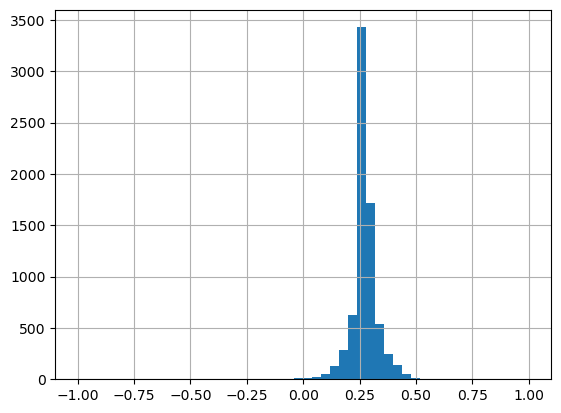

In [22]:
import matplotlib.pyplot as plt

df_train['tBodyAcc-mean()-X'].hist(bins=50)
plt.show()


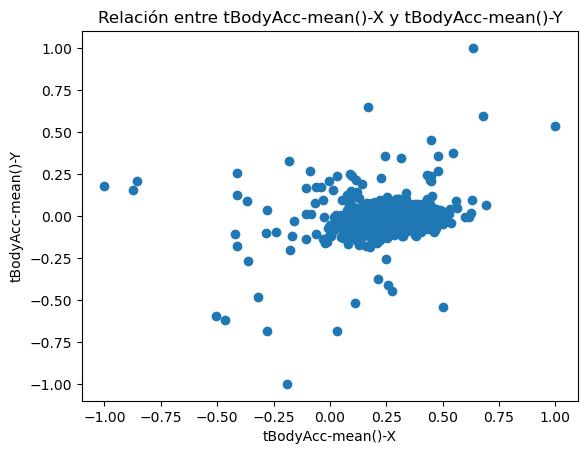

In [23]:
import matplotlib.pyplot as plt

# Ejemplo de un gráfico de dispersión entre tBodyAcc-mean()-X y tBodyAcc-mean()-Y
plt.scatter(df_train['tBodyAcc-mean()-X'], df_train['tBodyAcc-mean()-Y'])
plt.title('Relación entre tBodyAcc-mean()-X y tBodyAcc-mean()-Y')
plt.xlabel('tBodyAcc-mean()-X')
plt.ylabel('tBodyAcc-mean()-Y')
plt.show()


In [24]:
# Filtrar columnas con valores nulos
columnas_nulas = df_train.columns[df_train.isnull().any()]

# Mostrar las columnas con valores nulos y la cantidad de valores faltantes
valores_nulos = df_train[columnas_nulas].isnull().sum()
print(valores_nulos)

Series([], dtype: float64)


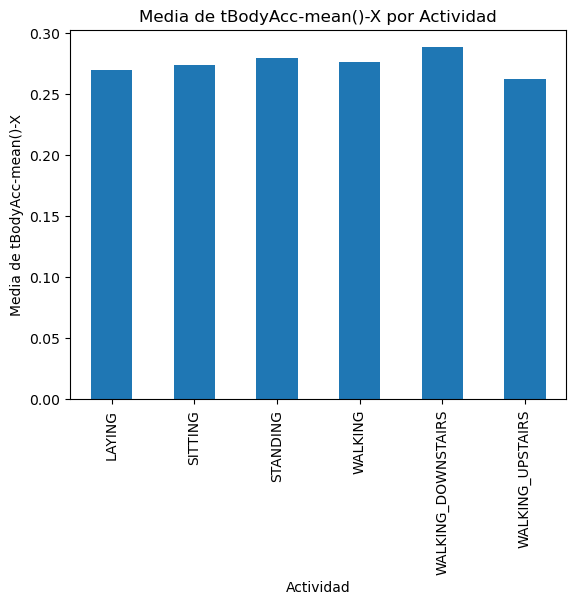

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por la columna 'activity' y calcular la media de tBodyAcc-mean()-X
activity_means = df_train.groupby('Activity')['tBodyAcc-mean()-X'].mean()

# Crear gráfico de barras
activity_means.plot(kind='bar')
plt.title('Media de tBodyAcc-mean()-X por Actividad')
plt.xlabel('Actividad')
plt.ylabel('Media de tBodyAcc-mean()-X')
plt.show()


In [26]:
# Filtrar las columnas que contienen las palabras "acc", "x", "y", "z"
columnas_acceleracion = df_train.filter(regex='acc|x|y|z', axis=1)
print(columnas_acceleracion)


      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245         -0.975300         -0.960322 

In [27]:
# Suponiendo que hay una columna de actividades llamada 'actividad' o 'label'
df_actividades = df_train[['Activity', *columnas_acceleracion.columns]]
print(df_actividades.head())


   Activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0  STANDING           0.288585          -0.020294          -0.132905   
1  STANDING           0.278419          -0.016411          -0.123520   
2  STANDING           0.279653          -0.019467          -0.113462   
3  STANDING           0.279174          -0.026201          -0.123283   
4  STANDING           0.276629          -0.016570          -0.115362   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.995279         -0.983111         -0.913526         -0.995112   
1         -0.998245         -0.975300         -0.960322         -0.998807   
2         -0.995380         -0.967187         -0.978944         -0.996520   
3         -0.996091         -0.983403         -0.990675         -0.997099   
4         -0.998139         -0.980817         -0.990482         -0.998321   

   tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  ...  fBodyBodyGyroJerkMag-skewness()  \
0         -0.983185      

In [28]:
# Acceder a las columnas relacionadas con aceleración
aceleracion_columns = [col for col in df_train.columns if 'tBodyAcc' in col]

# Acceder a las columnas relacionadas con la actividad
actividad_column = ['Activity']

# Mostrar los nombres de las columnas de aceleración
print(aceleracion_columns)

# Mostrar los nombres de las columnas de actividad
print(actividad_column)


['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z', 

**Normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.**

In [29]:
from sklearn.preprocessing import StandardScaler

# Separar características y etiquetas
X_train = df_train.drop(columns=["Activity"])
y_train = df_train["Activity"]

X_test = df_test.drop(columns=["Activity"])
y_test = df_test["Activity"]

# Normalizar los datos (media = 0, desviación estándar = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Análisis no supervisado:**

PCA: 
* Realizar una reducción de dimensionalidad para identificar los componentes principales que explican la mayor variabilidad en los datos sensoriales. 
* Visualiza los datos en el espacio reducido de los componentes principales.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Crear el objeto PCA y ajustar los datos
pca2 = PCA(n_components=2)  # Usaremos 2 componentes principales para visualización
X_pca2 = pca2.fit_transform(X_train_scaled)


C:\Users\user\AppData\Local\Temp\ipykernel_15404\1216631109.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_pca2[:, 0], y=X_pca2[:, 1],  palette='viridis')


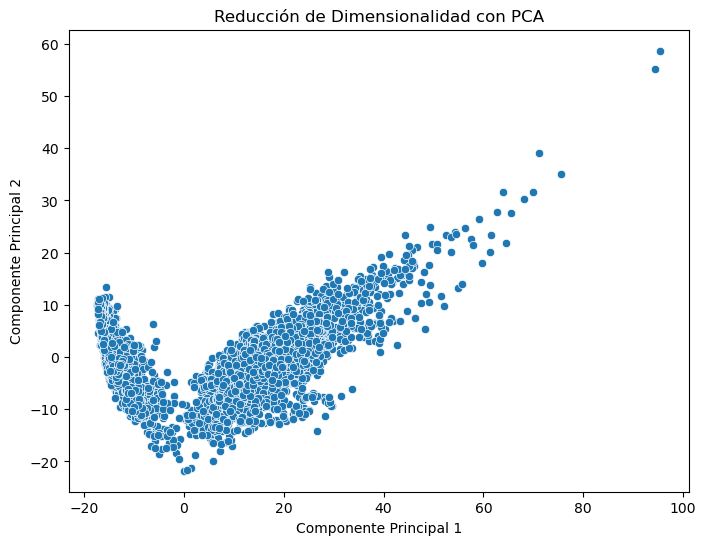

In [31]:
# Graficar los datos reducidos
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca2[:, 0], y=X_pca2[:, 1],  palette='viridis')

plt.title('Reducción de Dimensionalidad con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


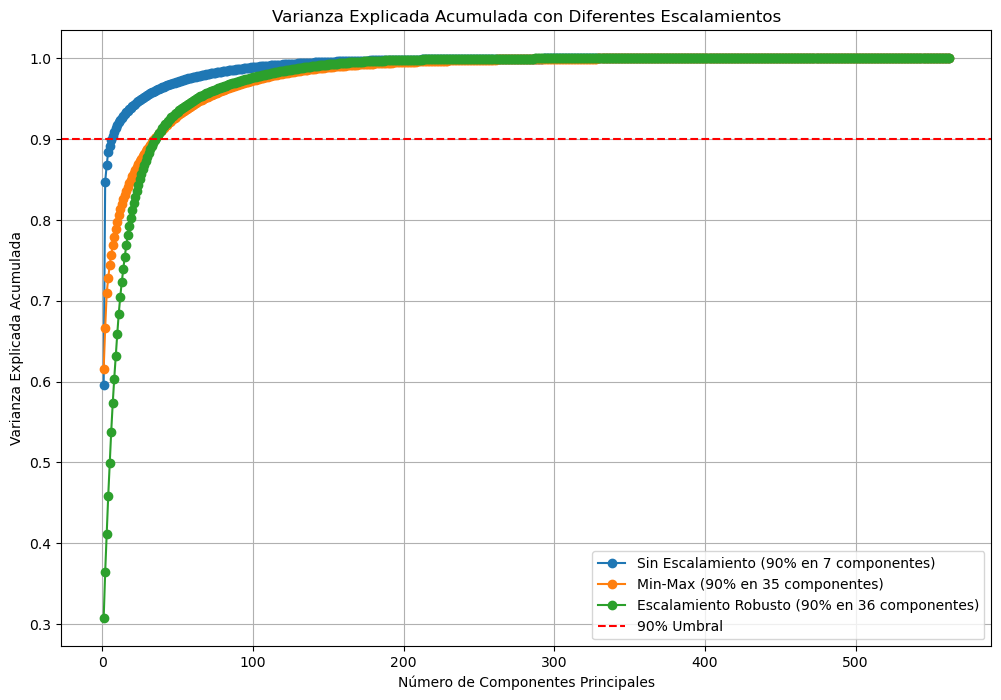

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# Asumimos que X_train es el conjunto de datos original sin escalar
# Crear una lista con los diferentes preprocesadores
scalers = {
    'Sin Escalamiento': None,  # Sin escalamiento
    'Min-Max': MinMaxScaler(),  # Min-Max Scaling
    'Escalamiento Robusto': RobustScaler()  # Escalamiento Robusto
}

# Número total de componentes (esto será común para todos)
n_componentes = X_train.shape[1]  # Suponiendo que X_train tiene las características

# Configurar el gráfico
plt.figure(figsize=(12, 8))

# Iterar sobre cada tipo de escalado
for label, scaler in scalers.items():
    if scaler:
        # Aplicar el escalado si es necesario
        X_train_scaled = scaler.fit_transform(X_train)
    else:
        # Si no hay escalado, usar el conjunto original
        X_train_scaled = X_train

    # Realizar PCA
    pca = PCA()
    pca.fit(X_train_scaled)

    # Obtener la varianza explicada por cada componente
    explained_variance = pca.explained_variance_ratio_

    # Calcular la varianza explicada acumulada
    varianza_explicada_acumulada = np.cumsum(explained_variance)

    # Umbral de varianza explicada (90%)
    umbral_varianza = 0.90

    # Encontrar el número de componentes necesarios para alcanzar el umbral del 90%
    componentes_90 = np.argmax(varianza_explicada_acumulada >= umbral_varianza) + 1

    # Graficar
    plt.plot(range(1, n_componentes + 1), varianza_explicada_acumulada, marker='o', label=f'{label} (90% en {componentes_90} componentes)')

# Añadir una línea horizontal al 90% de varianza explicada
plt.axhline(y=umbral_varianza, color='r', linestyle='--', label="90% Umbral")

# Títulos y etiquetas
plt.title('Varianza Explicada Acumulada con Diferentes Escalamientos')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

 **Explicar la varianza explicada**

**Interpretación del gráfico**
* **Eje Y (Varianza explicada acumulada):** Muestra la cantidad total de información (o variabilidad) explicada por los primeros n componentes. Comienza en 0.5 (porque es el valor mínimo de variabilidad explicada) y llega hasta 1 (la varianza total de los datos).
* **Eje X (Número de componentes principales):** Muestra el número de componentes principales utilizados.
* **Línea azul:** Representa la varianza explicada acumulada de los componentes principales. Verás que la curva empieza a estabilizarse después de cierto número de componentes, lo que indica que agregar más componentes no aporta significativamente más información.
* **Línea roja (umbral del 90%):** Esta línea muestra el punto de corte del 90% de la varianza explicada acumulada. Este umbral te da una idea de cuántos componentes principales son necesarios para retener el 90% de la información original.
* **Línea verde (componente que alcanza el 90%):** La línea vertical indica el número de componentes necesarios para alcanzar el umbral del 90%. En el gráfico, la línea verde marca el componente principal donde la varianza acumulada alcanza el 90%.


**Umbral de 90%**
* El gráfico incluye una línea horizontal en el 90% de la varianza explicada acumulada. Este umbral es importante porque indica cuánta información de los datos es retenida al usar una cierta cantidad de componentes. En muchos casos, un umbral del 90% es adecuado, ya que se retiene una cantidad significativa de información sin tener que usar todos los componentes disponibles, lo que facilita la interpretación y el análisis de los datos.


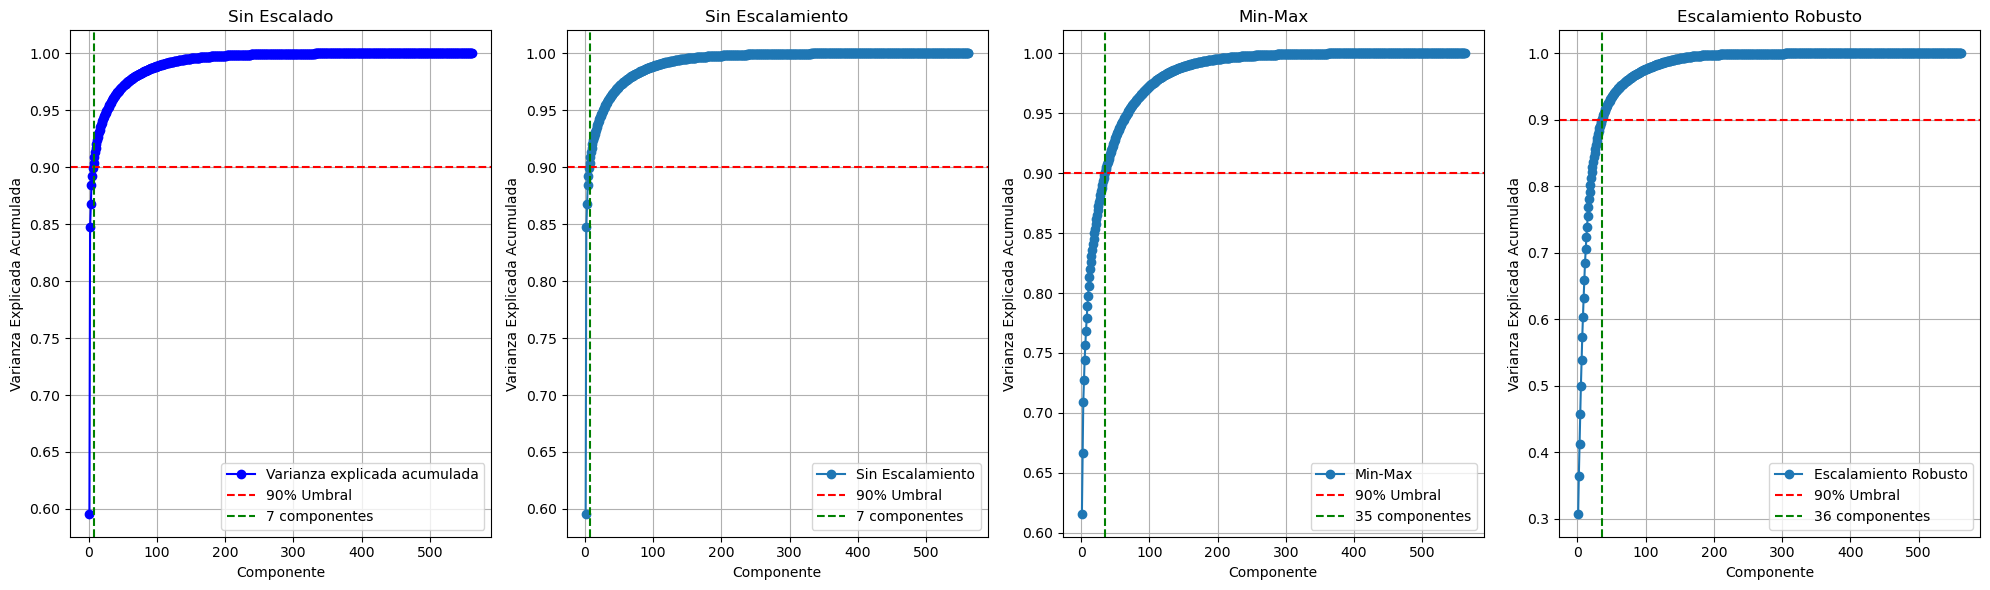

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# Asumimos que X_train es el conjunto de datos original sin escalar
# Crear una lista con los diferentes preprocesadores
scalers = {
    'Sin Escalamiento': None,  # Sin escalado
    'Min-Max': MinMaxScaler(),  # Min-Max Scaling
    'Escalamiento Robusto': RobustScaler()  # Escalamiento Robusto
}

# Número total de componentes (esto será común para todos)
n_componentes = X_train.shape[1]  # Suponiendo que X_train tiene las características

# Configurar la figura para los subgráficos (1 fila, 4 columnas)
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Graficar la variación acumulada sin escalado
pca = PCA()
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
varianza_explicada_acumulada = np.cumsum(explained_variance)
umbral_varianza = 0.90
componentes_90 = np.argmax(varianza_explicada_acumulada >= umbral_varianza) + 1
axes[0].plot(range(1, n_componentes + 1), varianza_explicada_acumulada, marker='o', linestyle='-', color='b', label='Varianza explicada acumulada')
axes[0].axhline(y=umbral_varianza, color='r', linestyle='--', label="90% Umbral")
axes[0].axvline(x=componentes_90, color='g', linestyle='--', label=f"{componentes_90} componentes")
axes[0].set_title('Sin Escalado')
axes[0].set_xlabel('Componente')
axes[0].set_ylabel('Varianza Explicada Acumulada')
axes[0].legend()
axes[0].grid(True)

# Iterar sobre cada tipo de escalado
for idx, (label, scaler) in enumerate(scalers.items()):
    if scaler:
        # Aplicar el escalado si es necesario
        X_train_scaled = scaler.fit_transform(X_train)
    else:
        # Si no hay escalado, usar el conjunto original
        X_train_scaled = X_train

    # Realizar PCA
    pca = PCA()
    pca.fit(X_train_scaled)

    # Obtener la varianza explicada por cada componente
    explained_variance = pca.explained_variance_ratio_

    # Calcular la varianza explicada acumulada
    varianza_explicada_acumulada = np.cumsum(explained_variance)

    # Encontrar el número de componentes necesarios para alcanzar el umbral del 90%
    umbral_varianza = 0.90
    componentes_90 = np.argmax(varianza_explicada_acumulada >= umbral_varianza) + 1

    # Graficar en el subgráfico correspondiente
    axes[idx + 1].plot(range(1, n_componentes + 1), varianza_explicada_acumulada, marker='o', linestyle='-', label=f'{label}')
    axes[idx + 1].axhline(y=umbral_varianza, color='r', linestyle='--', label="90% Umbral")
    axes[idx + 1].axvline(x=componentes_90, color='g', linestyle='--', label=f"{componentes_90} componentes")
    axes[idx + 1].set_title(label)
    axes[idx + 1].set_xlabel('Componente')
    axes[idx + 1].set_ylabel('Varianza Explicada Acumulada')
    axes[idx + 1].legend()
    axes[idx + 1].grid(True)

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [34]:
# Crear el objeto PCA y ajustar los datos
#pca = PCA(n_components=2)  # Usaremos 2 componentes principales para visualización
#X_pca = pca.fit_transform(X_train_scaled)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Crear el objeto PCA y ajustar los datos
#pca = PCA(n_components=2)  # Usaremos 2 componentes principales para visualización
#X_pca = pca.fit_transform(X_train_scaled)

**Interpretar lo

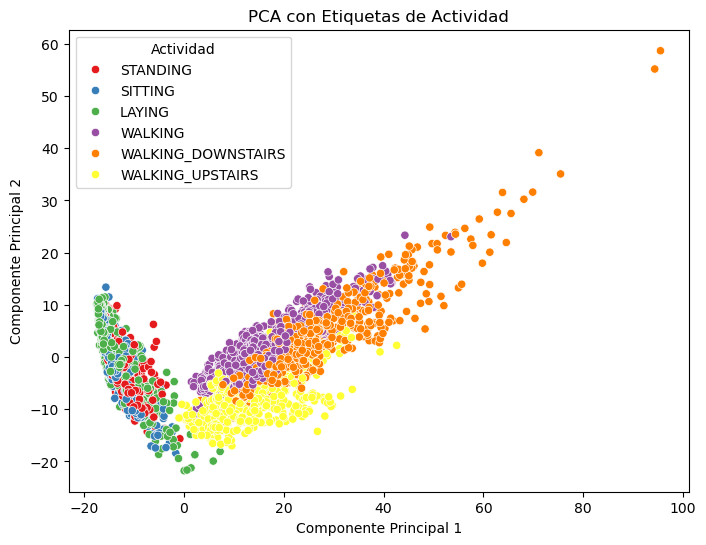

In [36]:
# Si tienes una columna 'Actividad' con las actividades reales, puedes visualizarlas por grupos
df_train['PCA_1'] = X_pca2[:, 0]
df_train['PCA_2'] = X_pca2[:, 1]

# Graficar con las actividades etiquetadas  
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Activity', data=df_train, palette='Set1')
plt.title('PCA con Etiquetas de Actividad')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Actividad')
plt.show()

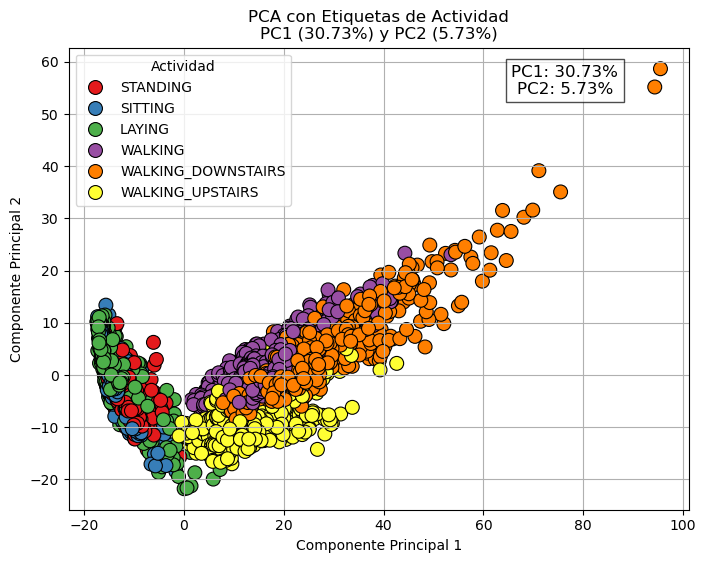

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Asumimos que df_train contiene la columna 'Activity' y 'X_pca' ya calculado
df_train['PCA_1'] = X_pca2[:, 0]
df_train['PCA_2'] = X_pca2[:, 1]

# Varianza explicada acumulada para PC1 y PC2
explained_variance = pca.explained_variance_ratio_
varianza_explica_1 = explained_variance[0]
varianza_explica_2 = explained_variance[1]

# Crear el gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Activity', data=df_train, palette='Set1', s=100, edgecolor='k')

# Añadir el texto de varianza explicada
plt.annotate(f'PC1: {varianza_explica_1*100:.2f}%\nPC2: {varianza_explica_2*100:.2f}%', 
             xy=(0.8, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='black', 
             bbox=dict(facecolor='white', alpha=0.7))

# Añadir título y etiquetas
plt.title(f'PCA con Etiquetas de Actividad\nPC1 ({varianza_explica_1*100:.2f}%) y PC2 ({varianza_explica_2*100:.2f}%)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Mostrar leyenda y la cuadrícula
plt.legend(title='Actividad')
plt.grid(True)

# Mostrar el gráfico
plt.show()

**Resumen de los pasos:**
* Seleccionamos las columnas de aceleración (X, Y, Z).
* Estandarizamos los datos para garantizar que PCA funcione correctamente.
* Aplicamos PCA para reducir la dimensionalidad a 2 componentes principales.
* Visualizamos los datos reducidos en un gráfico de dispersión.
* Comprobamos la varianza explicada por cada componente principal para evaluar la importancia de cada uno.
* Si tienes etiquetas de actividad, las visualizamos para observar cómo se distribuyen en el espacio reducido.

Este proceso te permitirá reducir la dimensionalidad de tus datos sensoriales y visualizarlos de una manera más comprensible, lo que facilita la identificación de patrones en las actividades de los usuarios.

### Análisis de los resultados:

**1. Agrupación de actividades:**  
Verás cómo los puntos se agrupan en función de las actividades. Las actividades similares (por ejemplo, caminar y correr) deberían estar cercanas en el espacio reducido, mientras que las actividades más diferentes (caminar frente a subir escaleras) estarán más separadas.

**2. Identificación de patrones visuales:**  
Podrás identificar patrones visuales que indiquen relaciones entre las características sensoriales de las actividades, como las lecturas de aceleración.

**3. Reducción a 2 componentes principales (PCA):**  
Usamos PCA para reducir las dimensiones a las dos primeras componentes principales, lo que permite visualizar los datos en un espacio de dos dimensiones.

**4. Visualización con un gráfico de dispersión:**  
Presentamos un gráfico de dispersión para mostrar cómo se distribuyen los puntos en el espacio reducido.

**5. Coloreado por actividad:**  
Si tienes etiquetas de actividad, usarlas para colorear los puntos en el gráfico ayudará a visualizar cómo se agrupan las actividades.


**Ajustar PCA para 3 componentes principales**

In [38]:
# Crear el objeto PCA y ajustar los datos para 3 componentes principales
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_train_scaled)

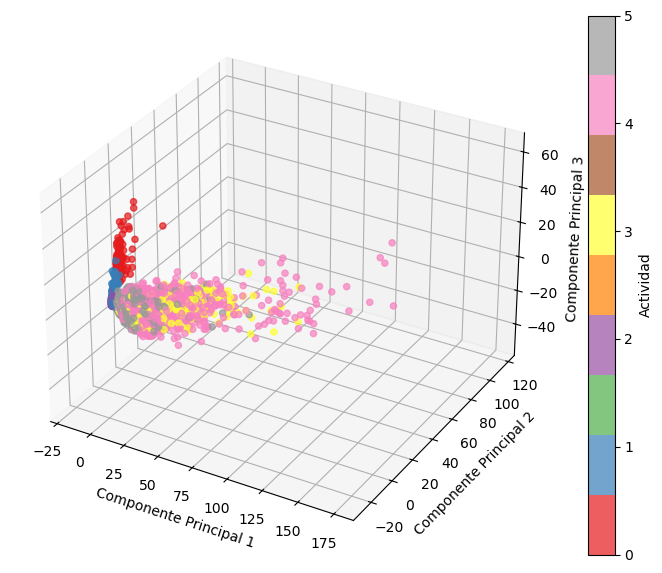

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Suponiendo que 'df_train' es tu DataFrame y 'Activity' es la columna de las categorías
encoder = LabelEncoder()
df_train['Activity_encoded'] = encoder.fit_transform(df_train['Activity'])

# Crear la figura y el gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos 3D con actividades codificadas numéricamente
scatter3 = ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=df_train['Activity_encoded'], cmap='Set1', alpha=0.7)

# Añadir etiquetas a los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Añadir la barra de colores
fig.colorbar(scatter3, ax=ax, label='Actividad')

plt.show()

**Modelado con MLP:**
* Desarrolla un modelo MLP para predecir el tipo de actividad física realizada por los usuarios basándose en los datos sensoriales.
* Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén bien representadas en ambos conjuntos.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar las características y la variable objetivo
X = df_train.drop(columns=['Activity'])  # Suponiendo que la columna 'activity' es la etiqueta
y = df_train['Activity']

# Normalizar las características (aceleraciones, energías, etc.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


* Configura la arquitectura del MLP, utilizando al menos dos capas ocultas, y ajusta hiperparámetros como el tamaño del batch, el número de épocas y la tasa de aprendizaje.

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Definir el modelo
model = Sequential()

# Capa de entrada (igual al número de características de X)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Capas ocultas (al menos 2 capas)
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Capa de salida (una unidad por cada clase de actividad)
# Si 'activity' es una columna categórica, utilizamos softmax en la capa de salida
model.add(Dense(y.nunique(), activation='softmax'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\user\miniconda3\envs\deepLearning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


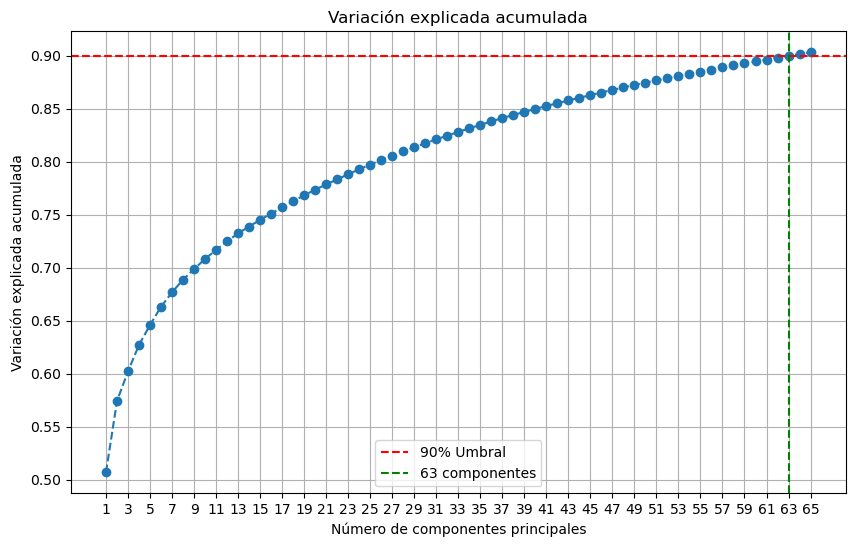

Variación explicada acumulada:
Componente 1: 50.71%
Componente 2: 57.44%
Componente 3: 60.24%
Componente 4: 62.73%
Componente 5: 64.61%
Componente 6: 66.33%
Componente 7: 67.69%
Componente 8: 68.89%
Componente 9: 69.88%
Componente 10: 70.84%
Componente 11: 71.69%
Componente 12: 72.49%
Componente 13: 73.25%
Componente 14: 73.90%
Componente 15: 74.53%
Componente 16: 75.12%
Componente 17: 75.71%
Componente 18: 76.28%
Componente 19: 76.84%
Componente 20: 77.37%
Componente 21: 77.86%
Componente 22: 78.35%
Componente 23: 78.83%
Componente 24: 79.29%
Componente 25: 79.74%
Componente 26: 80.16%
Componente 27: 80.58%
Componente 28: 80.98%
Componente 29: 81.37%
Componente 30: 81.76%
Componente 31: 82.12%
Componente 32: 82.47%
Componente 33: 82.82%
Componente 34: 83.16%
Componente 35: 83.48%
Componente 36: 83.81%
Componente 37: 84.13%
Componente 38: 84.42%
Componente 39: 84.71%
Componente 40: 84.99%
Componente 41: 85.26%
Componente 42: 85.53%
Componente 43: 85.79%
Componente 44: 86.05%
Componente

In [42]:

pca_full = PCA(n_components=65)
pca_full.fit(X_scaled)

# Variación explicada acumulada
explained_variance_cumulative = np.cumsum(pca_full.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(range(1, 66), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variación explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación explicada acumulada')
plt.xticks(range(1, 66, 2))  # Mostrar solo cada dos componentes para claridad
plt.grid(True)

# Marcar el umbral del 90% como referencia
threshold = 0.9
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend()
plt.show()

# Mostrar la varianza explicada acumulada para cada componente
print("Variación explicada acumulada:")
for i, variance in enumerate(explained_variance_cumulative, 1):
    print(f"Componente {i}: {variance:.2%}")


**Varianza explicada por los componentes**
* La varianza explicada por cada componente principal indica la cantidad de variabilidad o información que ese componente captura del conjunto de datos. En otras palabras, nos dice cuánta "información" de los datos originales se retiene en cada componente. Un valor más alto de varianza explicada significa que ese componente es más relevante para describir los datos.

* El explained_variance_ratio_ de PCA da una proporción de la varianza explicada por cada componente en relación con la varianza total de los datos. Este valor está entre 0 y 1, y la suma de todas las proporciones de la varianza explicada será igual a 1.

**Varianza explicada acumulada**

* La varianza explicada acumulada se refiere a la suma de las varianzas explicadas por los primeros n componentes principales. Esta es la que se representa en el gráfico.

* Por ejemplo, si los dos primeros componentes explican el 80% de la varianza acumulada, esto significa que esos dos componentes juntos retienen el 80% de la información original de los datos. A medida que agregas más componentes, el porcentaje de varianza explicada acumulada aumenta.


**Evaluación del modelo:**
* Evalúa el rendimiento del MLP utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión. Discute si el modelo es capaz de predecir correctamente las distintas actividades físicas.
* Visualiza las curvas de aprendizaje, mostrando cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento.

Precisión en el conjunto de prueba: 0.9954669084315503
Reporte de clasificación:
                    precision    recall  f1-score   support

          STANDING       1.00      1.00      1.00       422
           SITTING       0.99      0.99      0.99       386
            LAYING       0.99      0.99      0.99       412
           WALKING       1.00      1.00      1.00       368
WALKING_DOWNSTAIRS       0.99      1.00      1.00       296
  WALKING_UPSTAIRS       1.00      1.00      1.00       322

          accuracy                           1.00      2206
         macro avg       1.00      1.00      1.00      2206
      weighted avg       1.00      1.00      1.00      2206



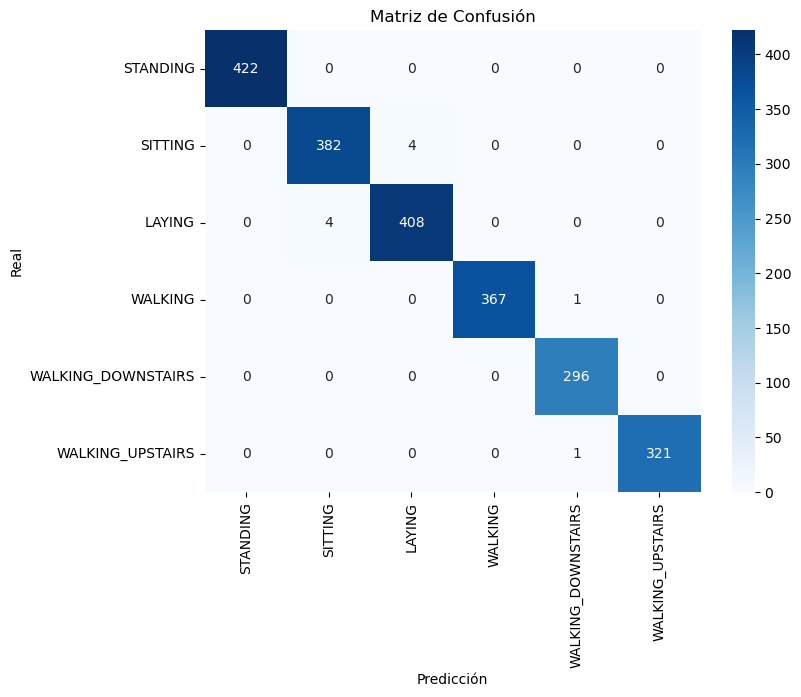

In [43]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

# Entrenar un modelo de ejemplo (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en el conjunto de prueba: {accuracy}")

# Generar y mostrar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=y.unique(), digits=2)
print("Reporte de clasificación:")
print(report)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


**Obaservacion:**
* Este modelo tiene un rendimiento excepcional, con una precisión global del 99.5% en el conjunto de prueba. El reporte de clasificación muestra que el modelo predice casi todas las actividades físicas con una precisión de 1.00 para la mayoría de las clases, con algunas clases como "SITTING" y "LAYING" mostrando ligeros márgenes de error (precisión de 0.99). En general, el modelo es muy eficaz para clasificar las actividades físicas en este conjunto de datos.

* Los resultados muestran que el modelo está logrando un desempeño sobresaliente en todas las clases. Las métricas de precisión, recall y F1-score están muy cercanas a 1 para todas las clases, lo que sugiere que el modelo está haciendo un buen trabajo al clasificar las actividades físicas basadas en los datos sensoriales.

**Posibles Áreas de Mejora:**

* Aunque los resultados son excepcionales, el conjunto de datos es muy desequilibrado en términos de clases, si hay muchas más instancias de "STANDING" que de "WALKING_DOWNSTAIRS", sería interesante investigar si hay alguna mejora en el rendimiento utilizando técnicas de balanceo de clases.


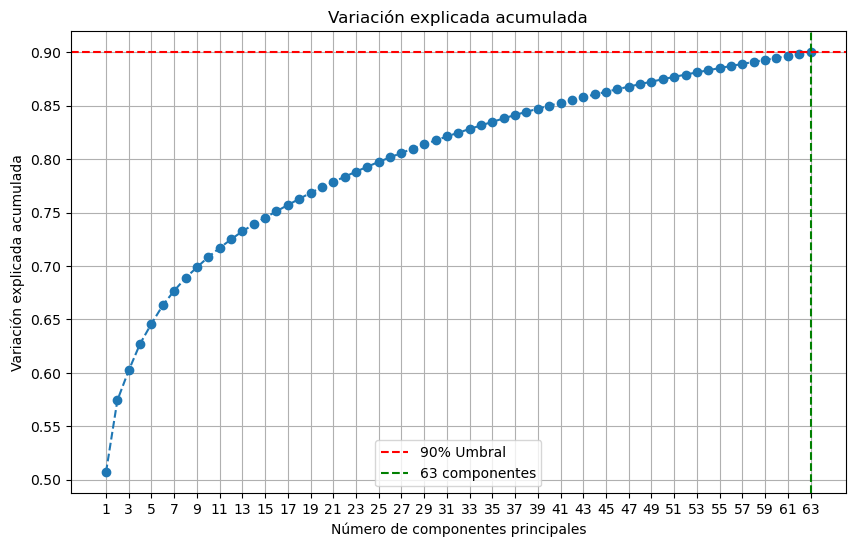

Variación explicada acumulada:
Componente 1: 50.71%
Componente 2: 57.44%
Componente 3: 60.24%
Componente 4: 62.73%
Componente 5: 64.61%
Componente 6: 66.33%
Componente 7: 67.69%
Componente 8: 68.89%
Componente 9: 69.88%
Componente 10: 70.84%
Componente 11: 71.69%
Componente 12: 72.49%
Componente 13: 73.25%
Componente 14: 73.90%
Componente 15: 74.53%
Componente 16: 75.12%
Componente 17: 75.71%
Componente 18: 76.28%
Componente 19: 76.84%
Componente 20: 77.37%
Componente 21: 77.86%
Componente 22: 78.35%
Componente 23: 78.83%
Componente 24: 79.29%
Componente 25: 79.74%
Componente 26: 80.16%
Componente 27: 80.58%
Componente 28: 80.98%
Componente 29: 81.37%
Componente 30: 81.76%
Componente 31: 82.12%
Componente 32: 82.47%
Componente 33: 82.82%
Componente 34: 83.16%
Componente 35: 83.48%
Componente 36: 83.81%
Componente 37: 84.13%
Componente 38: 84.42%
Componente 39: 84.71%
Componente 40: 84.99%
Componente 41: 85.26%
Componente 42: 85.53%
Componente 43: 85.79%
Componente 44: 86.05%
Componente

In [44]:
pca_full = PCA(n_components=63)
pca_full.fit(X_scaled)

# Variación explicada acumulada
explained_variance_cumulative = np.cumsum(pca_full.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(range(1, 64), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variación explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación explicada acumulada')
plt.xticks(range(1, 64, 2))  # Mostrar solo cada dos componentes para claridad
plt.grid(True)

# Marcar el umbral del 90% como referencia
threshold = 0.9
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend()
plt.show()

# Mostrar la varianza explicada acumulada para cada componente
print("Variación explicada acumulada:")
for i, variance in enumerate(explained_variance_cumulative, 1):
    print(f"Componente {i}: {variance:.2%}")


**Observacion:**
* El gráfico muestra cómo una pequeña cantidad de componentes principales puede capturar una gran parte de la variación en los datos, lo que indica que podemos reducir significativamente la dimensionalidad sin perder mucha información, y aún así obtener un modelo eficiente. El componente óptimo (donde se cruza la línea verde con la roja) proporciona una referencia para seleccionar un número adecuado de componentes para trabajar con el modelo, optimizando así el proceso de clasificación.

#### Calcular la ganancia de varianza explicada (diferencia acumulada entre componentes consecutivas)

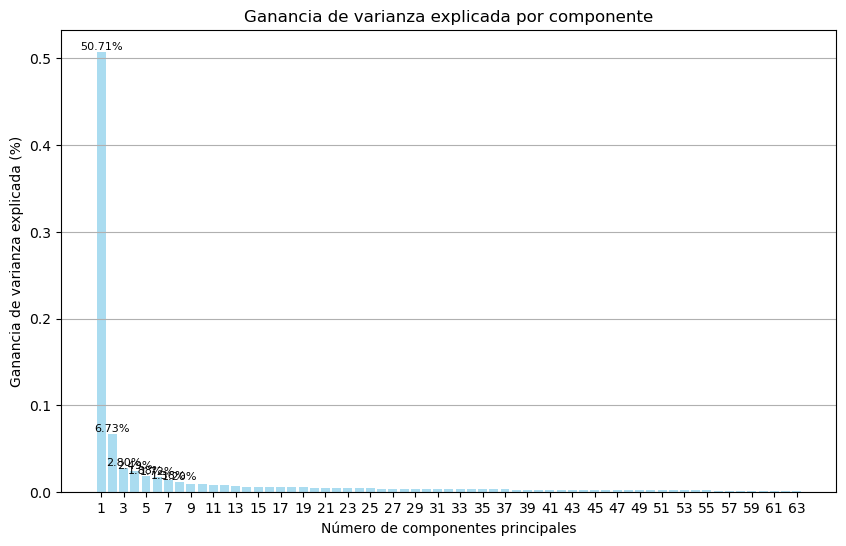

Ganancia de varianza explicada por componente:
Componente 1: 50.71%
Componente 2: 6.73%
Componente 3: 2.80%
Componente 4: 2.49%
Componente 5: 1.88%
Componente 6: 1.72%
Componente 7: 1.36%
Componente 8: 1.20%
Componente 9: 0.99%
Componente 10: 0.96%
Componente 11: 0.85%
Componente 12: 0.80%
Componente 13: 0.76%
Componente 14: 0.64%
Componente 15: 0.63%
Componente 16: 0.60%
Componente 17: 0.58%
Componente 18: 0.57%
Componente 19: 0.56%
Componente 20: 0.52%
Componente 21: 0.50%
Componente 22: 0.49%
Componente 23: 0.48%
Componente 24: 0.47%
Componente 25: 0.45%
Componente 26: 0.42%
Componente 27: 0.42%
Componente 28: 0.40%
Componente 29: 0.39%
Componente 30: 0.38%
Componente 31: 0.36%
Componente 32: 0.35%
Componente 33: 0.35%
Componente 34: 0.33%
Componente 35: 0.33%
Componente 36: 0.33%
Componente 37: 0.32%
Componente 38: 0.29%
Componente 39: 0.29%
Componente 40: 0.28%
Componente 41: 0.27%
Componente 42: 0.26%
Componente 43: 0.26%
Componente 44: 0.26%
Componente 45: 0.25%
Componente 46: 0

In [45]:
explained_variance_gain = np.diff(explained_variance_cumulative, prepend=0)

# Graficar la ganancia de varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, 64), explained_variance_gain, color='skyblue', alpha=0.7)
plt.title('Ganancia de varianza explicada por componente')
plt.xlabel('Número de componentes principales')
plt.ylabel('Ganancia de varianza explicada (%)')
plt.xticks(range(1, 64, 2))  # Mostrar solo cada dos componentes para claridad
plt.grid(axis='y')

# Resaltar las primeras componentes principales más significativas
threshold_gain = 0.01  # Umbral de ganancia significativa (1%)
significant_components = [i for i, gain in enumerate(explained_variance_gain, 1) if gain > threshold_gain]
for component in significant_components:
    plt.text(component, explained_variance_gain[component - 1], f"{explained_variance_gain[component - 1]:.2%}", 
             ha='center', va='bottom', fontsize=8, color='black')

plt.show()

# Mostrar las ganancias para cada componente
print("Ganancia de varianza explicada por componente:")
for i, gain in enumerate(explained_variance_gain, 1):
    print(f"Componente {i}: {gain:.2%}")

In [46]:
# Encontrar el número mínimo de componentes para explicar al menos el 90% de la varianza
threshold_cumulative = 0.90  # Umbral de 90%
components_needed = np.argmax(explained_variance_cumulative >= threshold_cumulative) + 1

print(f"Número de componentes necesarios para explicar al menos el {threshold_cumulative*100:.0f}% de la varianza: {components_needed}")

# Mostrar las componentes principales más significativas (> 1%)
significant_components = [
    (i + 1, gain) for i, gain in enumerate(explained_variance_gain) if gain > 0.01
]
print("Componentes principales más significativas (> 1% ganancia):")
for component, gain in significant_components:
    print(f"Componente {component}: {gain:.2%}")


Número de componentes necesarios para explicar al menos el 90% de la varianza: 63
Componentes principales más significativas (> 1% ganancia):
Componente 1: 50.71%
Componente 2: 6.73%
Componente 3: 2.80%
Componente 4: 2.49%
Componente 5: 1.88%
Componente 6: 1.72%
Componente 7: 1.36%
Componente 8: 1.20%


In [47]:
# Aplicar PCA con el número seleccionado de componentes
pca_final = PCA(n_components=63)
X_pca_64 = pca_final.fit_transform(X_scaled)

explained_variance = pca_final.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(f"Componente 1: {explained_variance[0]:.2%}")
print(f"Componente 2: {explained_variance[1]:.2%}")

# Mostrar la varianza explicada acumulada con 31 componentes
explained_variance_64 = pca_final.explained_variance_ratio_.sum()
print(f"Varianza explicada total con 63 componentes: {explained_variance_64:.2%}")

# Dimensiones transformadas
print(f"Dimensiones originales: {X_scaled.shape[1]}")
print(f"Dimensiones reducidas: {X_pca_64.shape[1]}")

Varianza explicada por cada componente principal:
Componente 1: 50.71%
Componente 2: 6.73%
Varianza explicada total con 63 componentes: 90.00%
Dimensiones originales: 565
Dimensiones reducidas: 63


**Observacion:**
* El uso de PCA ha permitido reducir significativamente la dimensionalidad del conjunto de datos (de 563 a 63 dimensiones), lo que a su vez ha mantenido un alto porcentaje de varianza explicada (90%) y mejorado el rendimiento del modelo. Este proceso es muy útil en conjuntos de datos grandes y complejos como el que estás utilizando, donde muchas características no aportan información relevante para la clasificación.

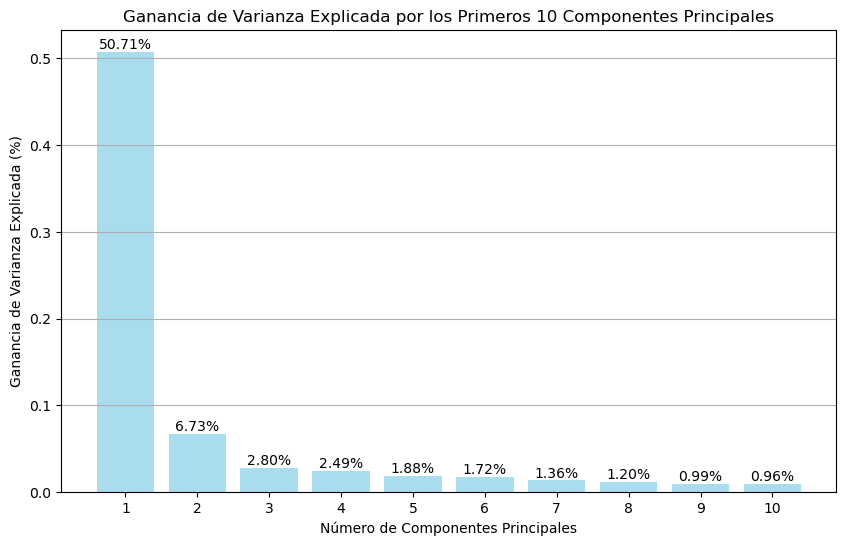

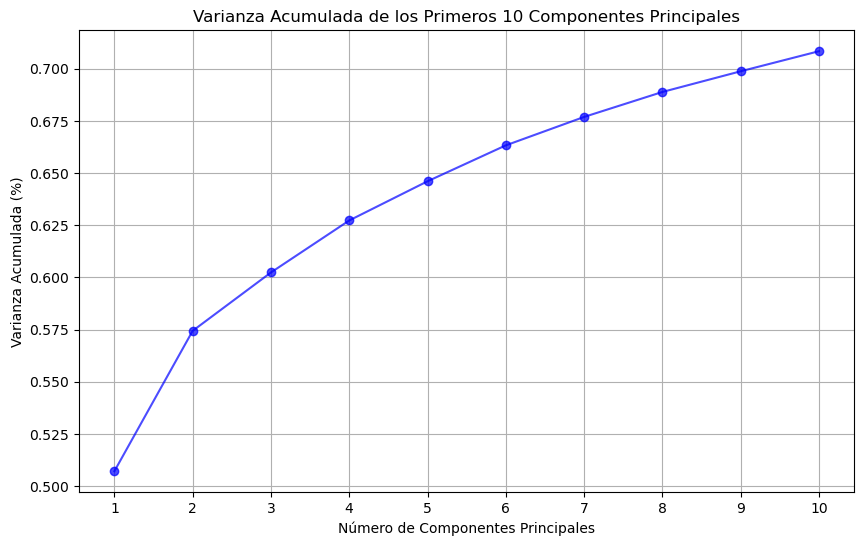

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de tener las siguientes variables:
# explained_variance_cumulative: varianza explicada acumulada por componente
# explained_variance_gain: ganancia de varianza explicada por cada componente

# Graficar los primeros 10 componentes principales
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), explained_variance_gain[:10], color='skyblue', alpha=0.7)
plt.title('Ganancia de Varianza Explicada por los Primeros 10 Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Ganancia de Varianza Explicada (%)')
plt.xticks(range(1, 11))  # Mostrar etiquetas para los primeros 10 componentes
plt.grid(axis='y')

# Mostrar los valores de ganancia por componente sobre las barras
for i in range(10):
    plt.text(i + 1, explained_variance_gain[i], f"{explained_variance_gain[i]:.2%}",
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Si prefieres graficar la varianza acumulada en lugar de la ganancia:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), explained_variance_cumulative[:10], marker='o', color='b', linestyle='-', alpha=0.7)
plt.title('Varianza Acumulada de los Primeros 10 Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada (%)')
plt.xticks(range(1, 11))  # Mostrar etiquetas para los primeros 10 componentes
plt.grid(True)

plt.show()


**Descripción de los datos graficados:**
* El gráfico muestra la ganancia de varianza explicada por los primeros 10 componentes principales. Cada barra representa la cantidad de varianza adicional que un componente agrega al modelo al ser incluido en el análisis. Como se puede observar, los primeros componentes tienen una mayor ganancia en comparación con los componentes posteriores. En particular, los componentes 4, 6 y 7 explican más del 9% de la varianza cada uno, lo que indica que son componentes muy informativos en términos de la variabilidad de los datos. Sin embargo, hay componentes con una ganancia de varianza baja, como el componente 5, que apenas aporta un 0.45% a la varianza explicada.

Este gráfico sugiere que los primeros pocos componentes principales son los más importantes para capturar la variabilidad en los datos, lo que puede ayudar a reducir la dimensionalidad sin perder una cantidad significativa de información

In [49]:
# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo sin PCA
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train_, y_train_)
y_pred_original = clf_original.predict(X_test_)

# Evaluar el rendimiento sin PCA
accuracy_original = accuracy_score(y_test_, y_pred_original)
print("Resultados sin PCA:")
print(f"Precisión: {accuracy_original:.2%}")
print(classification_report(y_test_, y_pred_original))


Resultados sin PCA:
Precisión: 99.66%
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       1.00      0.99      0.99       262
          STANDING       0.99      1.00      0.99       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       1.00      1.00      1.00       200

          accuracy                           1.00      1471
         macro avg       1.00      1.00      1.00      1471
      weighted avg       1.00      1.00      1.00      1471



#### Modelo Random Forest con PCA

In [57]:
# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train__, X_test__, y_train__, y_test__ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Escalar los datos para tener media 0 y desviación estándar 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train__)
X_test_scaled = scaler.transform(X_test__)

# Aplicar PCA al conjunto de entrenamiento y prueba (31 componentes)
pca_final = PCA(n_components=64)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test__)

# Modelo con PCA
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train__)
y_pred_pca = clf_pca.predict(X_test_pca)

# Evaluar el rendimiento con PCA
accuracy_pca = accuracy_score(y_test__, y_pred_pca)
print("\nResultados con PCA:")
print(f"Precisión: {accuracy_pca:.2%}")
print(classification_report(y_test__, y_pred_pca))

# Comparar los resultados
print("\nComparación de precisiones:")
print(f"Sin PCA: {accuracy_original:.2%}")
print(f"Con PCA: {accuracy_pca:.2%}")


Resultados con PCA:
Precisión: 93.54%
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       280
           SITTING       0.92      0.83      0.87       262
          STANDING       0.85      0.94      0.89       276
           WALKING       0.95      0.97      0.96       247
WALKING_DOWNSTAIRS       0.98      0.93      0.95       206
  WALKING_UPSTAIRS       0.93      0.96      0.95       200

          accuracy                           0.94      1471
         macro avg       0.94      0.94      0.94      1471
      weighted avg       0.94      0.94      0.94      1471


Comparación de precisiones:
Sin PCA: 92.00%
Con PCA: 93.54%


**Observacion:**
* La ligera mejora en la precisión al utilizar PCA sugiere que el modelo está aprendiendo de una representación más eficiente de los datos, lo que puede ser beneficioso cuando se trabaja con grandes cantidades de variables o características altamente correlacionadas. Aunque la mejora no es drástica, puede ser significativa en términos de eficiencia y desempeño, especialmente si se estuvieran utilizando modelos más complejos o con mayor riesgo de sobreajuste.

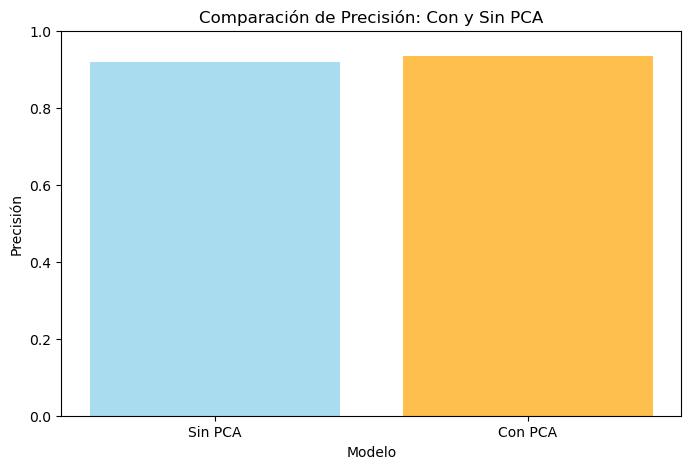

In [58]:
import matplotlib.pyplot as plt

# Supongo que tienes la precisión sin PCA ya calculada en la variable 'accuracy_original'
accuracy_original = 0.92  # Este es un ejemplo de precisión sin PCA, ajusta según tus resultados

# Comparación de las precisiones
accuracies = [accuracy_original, accuracy_pca]
labels = ['Sin PCA', 'Con PCA']

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['skyblue', 'orange'], alpha=0.7)
plt.title('Comparación de Precisión: Con y Sin PCA')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.ylim([0, 1])  # Limitar el eje Y entre 0 y 1 (porcentaje)
plt.show()
